# Temporal Characteristics of Cancelled Flights
### by Jason Kanhai

## Investigation Overview

This investigation will mostly focus on the temporal characteristics of Cancelled flights, particularly which days in the week tend to have more cancelled flights, months of the year and the scheduled durations of these flights. Focus will also be given some additional characteristics of these flights, including their typical distances covered and the reasons for being cancelled.

## Dataset Overview

The data provides details for over 7 million commercial flights within the USA for the year of 2008. It provides details on delayed flights, aircraft details, distance and length of flights, cancelled flights and reasons for cancellation. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('2008.csv')

### Percentage of Flights Cancelled
Out of the total 7009728 flights withing the USA in 2008, only 1.96% (137434) were Cancelled, while the remaining 98.04% (6872294) were still scheduled to Depart. 

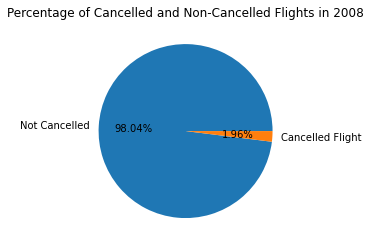

In [3]:
# % of flights Cancelled in 2008
di = {0: 'Not Cancelled', 1 : 'Cancelled Flight'}
flights['Cancelled'].replace(di, inplace = True)
A = flights['Cancelled'].unique()

plt.pie(flights.Cancelled.value_counts(), autopct='%.2f%%', labels = A);
plt.title('Percentage of Cancelled and Non-Cancelled Flights in 2008');

### Distribution of Scheduled Flight Duration of Cancelled Flights

Flight Duration takes on a wide range of values from as short as 30 minutes and as long as 1435 minutes. When plotted on a logarithmic scale, the distribution takes on a normal / unimodal distribution with a peak at around 80 - 100 minutes.

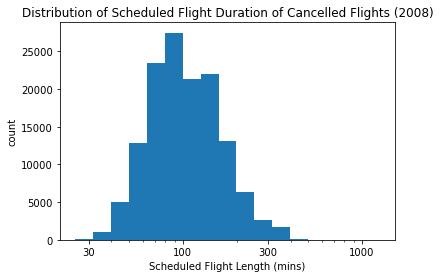

In [4]:
# create new dataframe of ONLY Cancelled Flights
Cancel = flights[flights["Cancelled"] == 'Cancelled Flight']

#Logarithmic distribution of Scheduled Flight duration

bins = 10**np.arange(1.4, 3.1 + 0.1, 0.1)
ticks = [30, 100, 300, 1000]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data = Cancel, x = 'CRSElapsedTime', bins = bins )
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel ('Scheduled Flight Length (mins)')
plt.ylabel ('count');
plt.title('Distribution of Scheduled Flight Duration of Cancelled Flights (2008)');

### Distribution of Flight Distances of Cancelled Flights

Flight Distances also take on a wide range of values with distances as short as 17 kilometers to and as far as 4502 kilometers. When plotted on a logarithmic scale, the distribution takes on a normal / unimodal distribution with a peak at around 500 - 900 kilometers.

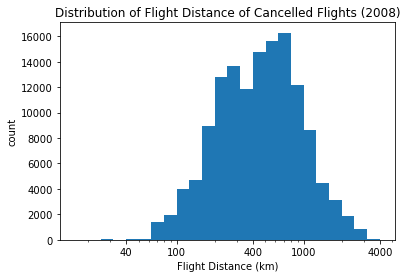

In [5]:
#Logarithmic distribution of  Flight Distances

bins = 10**np.arange(1.2, 3.6 + 0.1, 0.1)
ticks = [40, 100, 400, 1000, 4000]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data = Cancel, x = 'Distance', bins = bins )
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel ('Flight Distance (km)')
plt.ylabel ('count')
plt.title('Distribution of Flight Distance of Cancelled Flights (2008)');

### Cancellation Causes

From the Pie chart above we can see that most flights Cancelled in 2008 are due to Carrier issues (39.95%), 39.53%  are within the control of the National Airspacce System (NAS), 20.51% are Weather related while only 0.01% are due to Security issues.

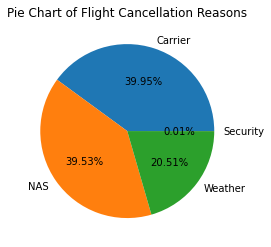

In [6]:
# Replace code with Reason from Metadata
CCdi = {'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security'}
Cancel['CancellationCode'].replace(CCdi, inplace = True)
X = Cancel['CancellationCode'].unique()

# Pie Chart of Reasons for Cancellation
plt.pie(Cancel.CancellationCode.value_counts(), autopct='%.2f%%', labels = X);
plt.title("Pie Chart of Flight Cancellation Reasons");

### % Flights Cancelled by Day

From the point plot below we can see that there is not much variation across the days of the week when it comes to % flights cancelled in 2008. Saturdays have the lowest % with only 1.58% of flights cancelled while Fridays have the most at 2.31%.

In [7]:
#Restore Cancellation Code
direv = {'Not Cancelled' : 0, 'Cancelled Flight': 1}
flights['Cancelled'].replace(direv, inplace = True)
A = flights['Cancelled'].unique()

In [8]:
# Calculate % chance flight cancellled by day
DOWCancel = (flights.groupby('DayOfWeek').Cancelled.mean()*100).reset_index()
DOWCancel.head(7)

,DayOfWeek,Cancelled
0,1,1.979635
1,2,2.244855
2,3,1.943126
3,4,1.732570
4,5,2.314798
5,6,1.582091
6,7,1.856714


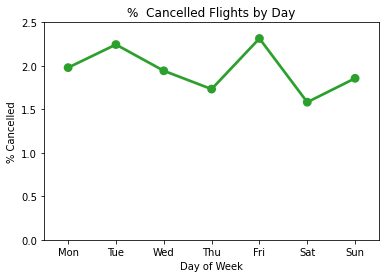

In [10]:
#Plot an adapted line plot to show variation in % chance cancelled across the week
base_color = sb.color_palette()[2]
width = 1
bins = np.arange(1, 8, width)
sb.pointplot(data = DOWCancel, x = 'DayOfWeek', y = 'Cancelled', color = base_color)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0,max(bins),width), name_days);
plt.ylim(0, 2.5)
plt.xlabel('Day of Week')
plt.ylabel('% Cancelled')
plt.title('%  Cancelled Flights by Day');

### % Flights Cancelled by Month

There is a greater variation in the % Flights Cancelled by Month of the yeaR, where only 0.58% of flights were cancelled in October but February had as many as 3.61% flights cancelled in 2008. There appears to be a high period of cancellations that occur from December to Marc h(2.6% - 3.6%), followed by a decreased level of cancellations between April and September (1.02% - 1.8%) and signifcant reducitons in cancellations in October and November (0.58% - 0.84%).

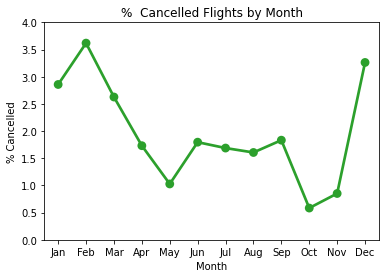

In [11]:
# Calculate % chance flight cancellled by Month
MOYCancel = (flights.groupby('Month').Cancelled.mean()*100).reset_index()
MOYCancel.head(12)

#Plot an adapted bar chart to show variation in % chance cancelled by month.
base_color = sb.color_palette()[2]
width = 1
bins = np.arange(0, 13, width)
sb.pointplot(data = MOYCancel, x = 'Month', y = 'Cancelled', color = base_color)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(0,max(bins),width), months_names);
plt.ylim(0,4)
plt.xlabel('Month')
plt.ylabel('% Cancelled')
plt.title('%  Cancelled Flights by Month');

### Flight Distance vs Duration

While we've looked at the distribution of values for Flight Distance and Duration independently, we did not look at the the relationship between these variables.

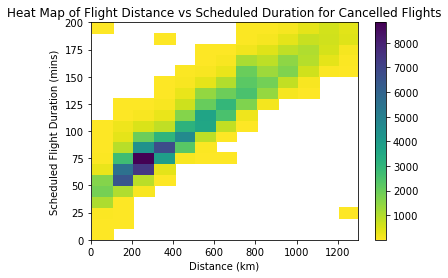

In [12]:
Cancel2 = Cancel.loc[(Cancel['CRSElapsedTime']<=500) & (Cancel['Distance'] <= 3000)]

# Taking a closer look at concentration of Cancelled flights
bins_x = np.arange(10, 2900+100, 100)
bins_y = np.arange(0, 490+100, 10)
plt.hist2d(data = Cancel2, x = 'Distance', y = 'CRSElapsedTime', cmin = 1, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.ylim(0,200)
plt.xlim(0,1300);
plt.xlabel('Distance (km)')
plt.ylabel('Scheduled Flight Duration (mins)')
plt.title('Heat Map of Flight Distance vs Scheduled Duration for Cancelled Flights');

While it is evident that there is direct relationship between Flight Distance and Duration, it is interesting to observe that a significant number of cancelled flights cover distances between 100km - 400km and durations between 50 minutes and 100 minutes. 

### Cancellation Type by Day

When looking at the individual Cancellation Types, we can see that they have differing trends across days of the week.
For Carrier related cancellations, more than 3000 cancellations happened collectively on Mondayys, Tuesdays and Wednesdays.
NAS related cancellations peaked on Fridays while Weather related cancellations were particularly high on Tuesdays and Fridays
There are too few Security cancellations to even be plotted, as we would rememebr they only make 0.01% of all cancelled flights in 2008

In [13]:
#Create subset dataframe that contains highest concentration of cancelled flights
MostCancel = Cancel2.loc[(Cancel2['CRSElapsedTime'].between(50,100, inclusive =True)) &
                         (Cancel2['Distance'].between(100,400,inclusive=True))]

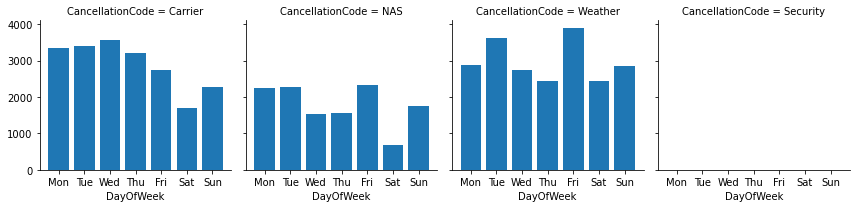

In [14]:
#Facet grid of Cancellations across week by Cancellation Code
width = 1
bins = np.arange(1, 9, width)
g = sb.FacetGrid(data = MostCancel, col = 'CancellationCode');
g.map (plt.hist, 'DayOfWeek', rwidth=.8, bins = bins);
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

### Cancellation Type by Month

Similarly when looking at Cancellation type trends across the month of 2008, we also see differing trends.
Carrier Cancellations are typically high between January to April (> 2000) but are especially low in September & October (< 1000). NAS Cancellations follow a similar trends with more cancellations in January, February and December with less cancentations in September to November.
Weather related cancellations were at an all time high in December (~ 4000) with lows in October and November (< 1000).
Security related cancellations are once again to few to be plotted on the given scale. 


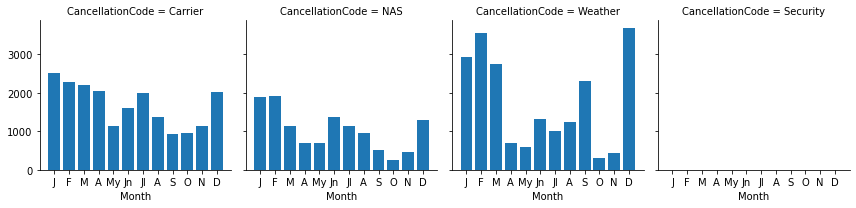

In [16]:
#Facet grid of Cancellations across week by Cancellation Code
width = 1
bins = np.arange(1, 14, width)
g = sb.FacetGrid(data = MostCancel, col = 'CancellationCode');
g.map (plt.hist, 'Month', rwidth=.8, bins = bins);
name_days = ['J', 'F', 'M', 'A', 'My', 'Jn', 'Jl', 'A', 'S', 'O', 'N', 'D']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

### Scheduled Departure Times for Various Cancellation Types

From the plot below we see that for most Cancelled flights, Carrier Cancellations have a median departure time of 1300 hrs (1:00pm), NAS Cancellation have a median of 1600 hrs (4pm), Weather Cancellations 1330hrs (130pm) and Security Cancellation a median of 1500hrs (3pm). Additionally, Weather and Security Cancellations occur across a broader range of Departure times than Carrier and NAS.

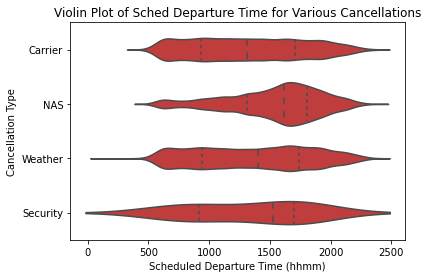

In [18]:
#Violin Plot of Scheduled Departure Times for Cancelled Flights (by Code)
base_color = sb.color_palette()[3]
sb.violinplot(data= MostCancel, y='CancellationCode', x='CRSDepTime', color=base_color, inner = 'quartile')
plt.ylabel('Cancellation Type')
plt.xlabel('Scheduled Departure Time (hhmm)')
plt.title('Violin Plot of Sched Departure Time for Various Cancellations');

Given the broad variation in departure times, Scheduled Departure would the be classified according to the following:

Early AM : 000 hours - 600 hours

Late AM: 601 hours - 1200 hours

Early PM: 1201 hours - 1800 hours

Late PM: 1801 - 2359 hours

In [19]:
# create a list of conditions for new column > Scheduled Departure Time of Day, "SchedDep_TOD"
conditions = [
    (MostCancel['CRSDepTime'] > 0) & (MostCancel['CRSDepTime'] <= 600),
    (MostCancel['CRSDepTime'] > 600) & (MostCancel['CRSDepTime'] <= 1200),
    (MostCancel['CRSDepTime'] > 1200) & (MostCancel['CRSDepTime'] <= 1800),
    (MostCancel['CRSDepTime'] > 1800) & (MostCancel['CRSDepTime'] <= 2400)
    ]

# create a list of the values we want to assign for each condition
values = ['Early_AM', 'Late_AM', 'Early_PM', 'Late_PM']

# create a new column and use np.select to assign values to it using our lists as arguments
MostCancel['Sched_Departure'] = np.select(conditions, values)

### Cancelled Flight Heatmap (by Distance, Duration, Scheduled Departure & Cancellation Type)

From the faceted heat maps below, we can deduce the following

Most Flights cancelled due to Carrier Cancellations usually cover distances of 200 - 400 km with durations of 60 - 90 minutes despite time of day. 

Most NAS Cancelled flights cover distances of 100 - 300 km with durations of 50 - 90 mins despite time of day. 

For for Weather related Cancellations, depsite the time of day, these flights typically cover distances of 200 - 250 km with a duration of 60-70 mins

Security related Cancellations do not occure in the Early AM but have a high frequency of occuring in the Early PM especially for flights with a duration of 60-70 mins and distances of 200-250km.


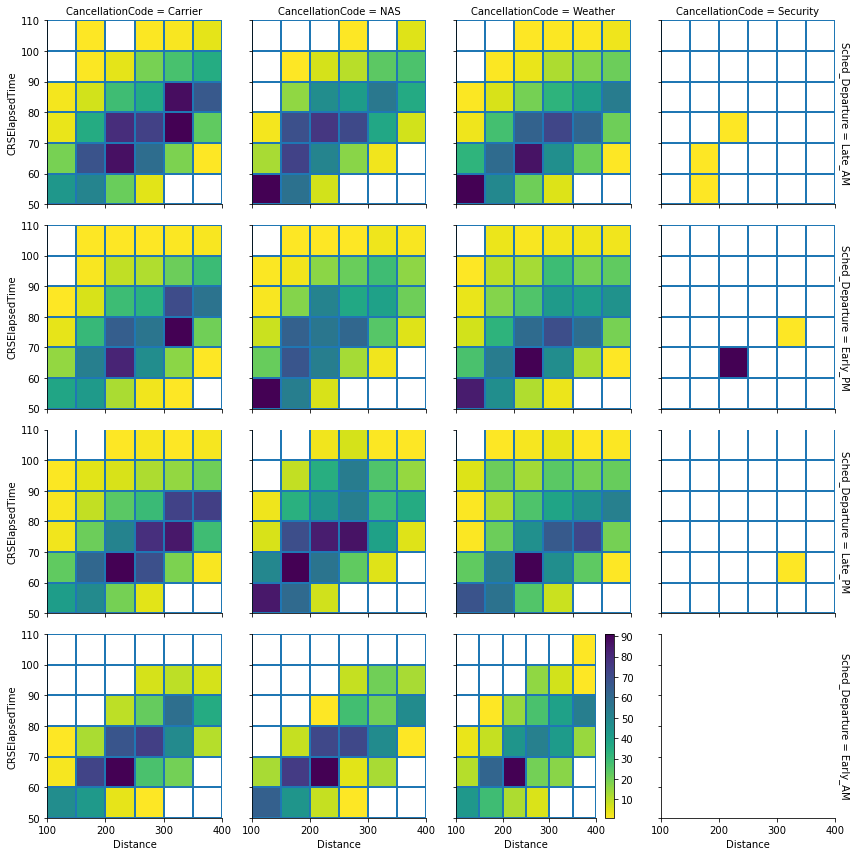

In [24]:
bins_x = np.arange(100, 400+50, 50)
bins_y = np.arange(50, 110+10, 10)
g = sb.FacetGrid(data = MostCancel, col = 'CancellationCode', row = 'Sched_Departure', margin_titles = True);
g.map (plt.hist2d, 'Distance', 'CRSElapsedTime', cmin = 1, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!